In [0]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
from google.colab import files


In [2]:
# For colab: 
!rm -rf Chaos
!git clone https://github.com/liminal-learner/Chaos.git
sys.path.append('/content/Chaos')

Cloning into 'Chaos'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 70 (delta 30), reused 43 (delta 16), pack-reused 0
Unpacking objects: 100% (70/70), done.


In [0]:
from Chaos.Simulator import Simulator

In [0]:
def plot_tableau(sim_record, n_agents):
    data_to_plot = sim_record.loc[sim_record['Number of Agents'] == n_agents]
        
    fig, ax = plt.subplots(nrows = 10, ncols = 10, figsize=(15, 15))
    ax = ax.reshape(-1)
    # 100 should be the right number of simulations, but only plot 100 regardless:
    for simulation in range(0, 100):
            ax[simulation].plot(data_to_plot['X Final'].iloc[simulation], data_to_plot['Y Final'].iloc[simulation], 'b.')
            ax[simulation].set_aspect('equal')
            ax[simulation].set_xlim(0, 1)
            ax[simulation].set_ylim(0, 1)
    fig.suptitle('Final Positions of Runs for {} Agents'.format(n_agents), fontsize=24)
    
    plt.show()


# Chaos

It is nice when I have an opportunity to bring my interdisciplinary interests together. I first learned the second of these demos (what I call the chaotic love triangle) in a dance class, but it draws on my background in computational physics to simulate the motion of particles. I also presented this notebook to a theology class that was discussing the metaphysics of agency as part of my work as a research assistant. 


A **chaotic system** is one in which very small changes in initial conditions lead to large differences in how the system evolves. Here is a simple example. 


## Example #1: Population Growth

Let xi be an initial population size, x[n+1] is next year's population, x[n] how many of the species are going to breed this year, (1-x[n]) represents compettion for resources if the population gets too big. K represents the coupling of these effects in the previous season to the present year. 
#### See Polkinghorne, J C. “The Nature of Physical Reality.” Zygon 35, no. 4 (December 2000): 927–40.


In [0]:
def modelPopSize(k,xi,n):
    x=xi*np.ones((n,1))
    for n in range(n-1):
        x[n+1]=k*x[n]*(1-x[n])
    return x

def plotPopSize(k,x1,x2,xi1,xi2):
    ax1=plt.subplot(1,2,1, title="K = {}, xi = {}".format(k,xi1),xlabel="Years",ylabel="PopSize")
    ax2=plt.subplot(1,2,2, title="K = {}, xi = {}".format(k,xi2),xlabel="Years",ylabel="PopSize")
    ax1.plot(x1)
    ax2.plot(x2)



### Population decay (K < 1)

* Not sensitive to initial conditions (left figure looks the same as the right)


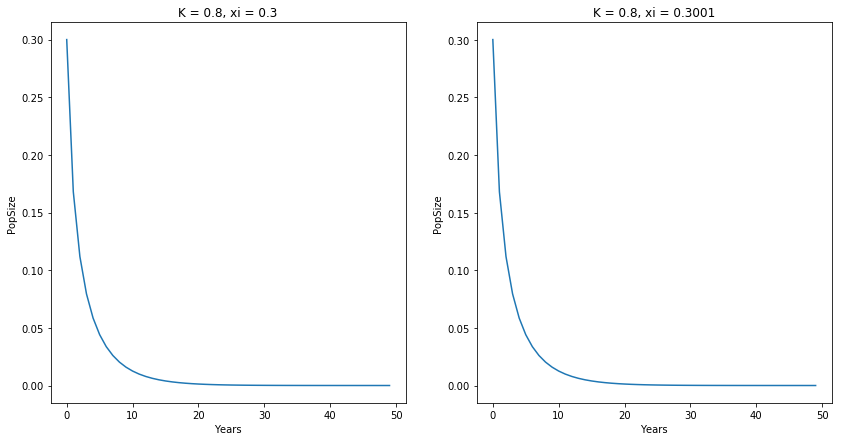

In [0]:
k=0.8
n=50
xi1=0.3
xi2=0.3001
plt.rcParams['figure.figsize'] = (14, 7)

x1=modelPopSize(k,xi1,n)
x2=modelPopSize(k,xi2,n)
plotPopSize(k,x1,x2,xi1,xi2)

### Stable population (K = 2)

* Not sensitive to initial conditions (left figure looks the same as the right)

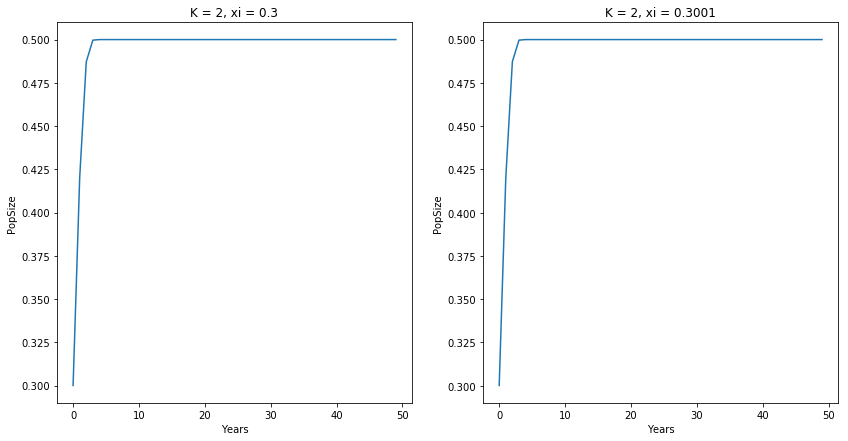

In [0]:
k=2
n=50
xi1=0.3
xi2=0.3001
x1=modelPopSize(k,xi1,n)
x2=modelPopSize(k,xi2,n)
plotPopSize(k,x1,x2,xi1,xi2)

### Bifurcation (K = 3.2)

* Oscillates between two stable population sizes
* Not sensitive to initial conditions (left figure looks the same as the right)

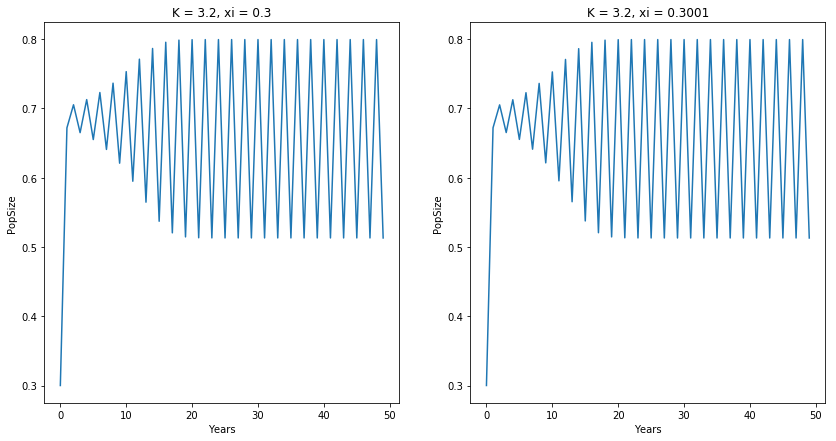

In [0]:
k=3.2
n=50
xi1=0.3
xi2=0.3001
x1=modelPopSize(k,xi1,n)
x2=modelPopSize(k,xi2,n)
plotPopSize(k,x1,x2,xi1,xi2)

### Fourfold Oscillation (K = 3.5)

* Not sensitive to initial conditions (left figure looks the same as the right)

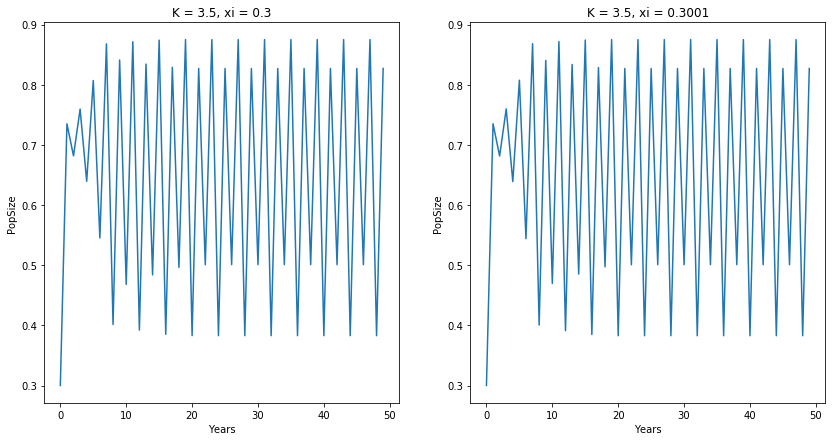

In [0]:
k=3.5
n=50
xi1=0.3
xi2=0.3001
x1=modelPopSize(k,xi1,n)
x2=modelPopSize(k,xi2,n)
plotPopSize(k,x1,x2,xi1,xi2)

### Chaotic Regime (K > 3.58)

* Very sensitive to initial conditions (compare left figure to right)

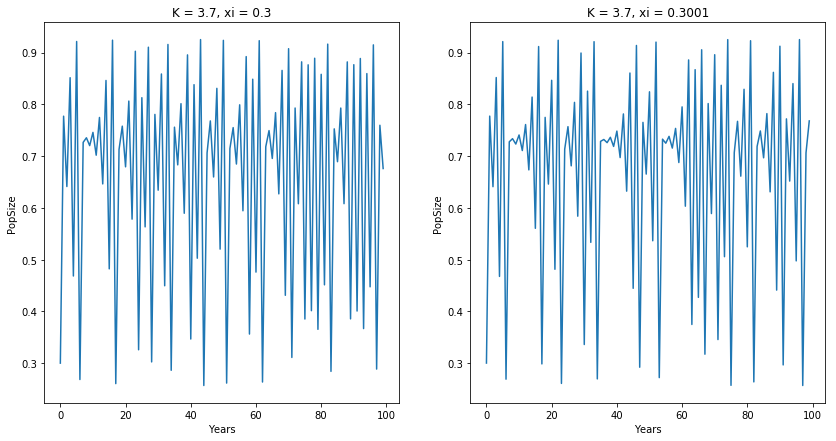

In [0]:
k=3.7
n=100
xi1=0.3
xi2=0.3001
x1=modelPopSize(k,xi1,n)
x2=modelPopSize(k,xi2,n)
plotPopSize(k,x1,x2,xi1,xi2)
#ax1=plt.subplot(1,1,1, title="K = {}, xi = {}".format(k,xi1),xlabel="Years",ylabel="PopSize")
#ax2=plt.subplot(2,1,2, title="K = {}, xi = {}".format(k,xi2),xlabel="Years",ylabel="PopSize")
#ax1.plot(x1)
#ax2.plot(x2)

## Example #2: The Chaotic Love Triangles

In this icebreaker game, each person/agent selects two other people to track throughout the game. Without saying who, they attempt to create an equilateral triangle with these two people. Everyone starts at random positions in the room, and the game progresses as people move to achieve their objective. 

This is a **chaotic system** because small changes in initial conditions or perturbations of the system can lead to very different histories and final outcomes of the system (such as whether the system **converges** or not). 

### Version 1: Agents hop directly to their desired positions (no travel time)

* This is the first prototype because it does not require any vector projections to define smaller motions toward desired points. Instead, you merely identify the desired points and move directly there on the next iteration. This means that the system always has large dynamical changes and so it is unlikely to settle down.


* The desired points are the **two possible vertices** that would create an equilateral triangle between the agent and her attractors. However, it is possible/likely that one or both of these points will lie outside the bounds of the room. 


* **Algorithm**: Out of the points that would form an equilateral triangle with the agent and her attractors that also lie **in bounds**, use the one **closest** to the agent's present position to update her position on the next iteration. If neither lies in bounds, then the agent **doesn't move** at this iteration.

In [0]:
# This has to be 'notebook' or else the dynamic plot update won't work here within the notebook
%matplotlib notebook

<IPython.core.display.Javascript object>


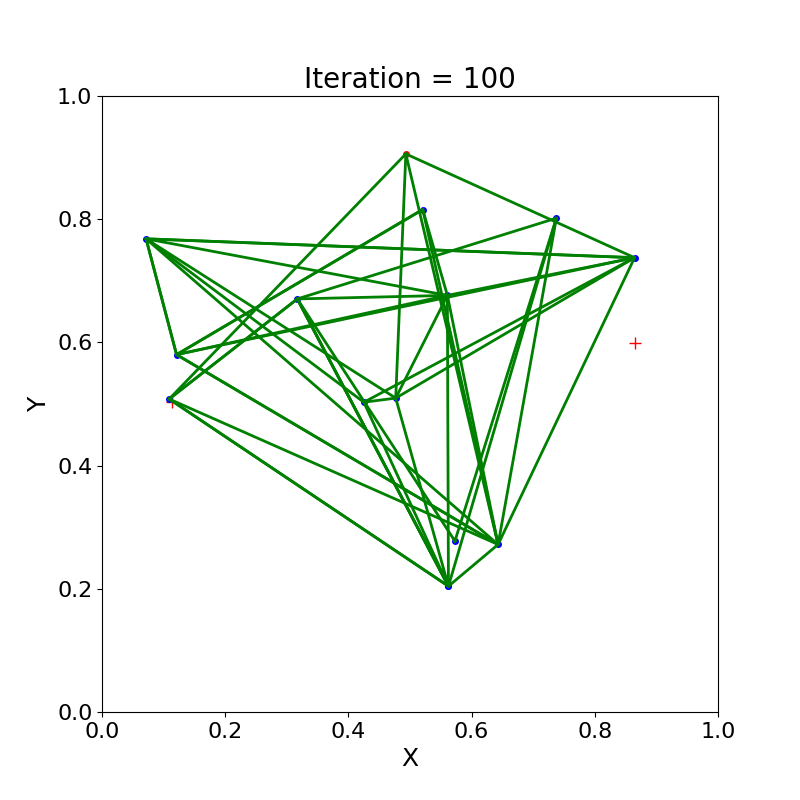

//anaconda/lib/python3.6/site-packages/matplotlib/backend_bases.py:2453: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


<IPython.core.display.Javascript object>


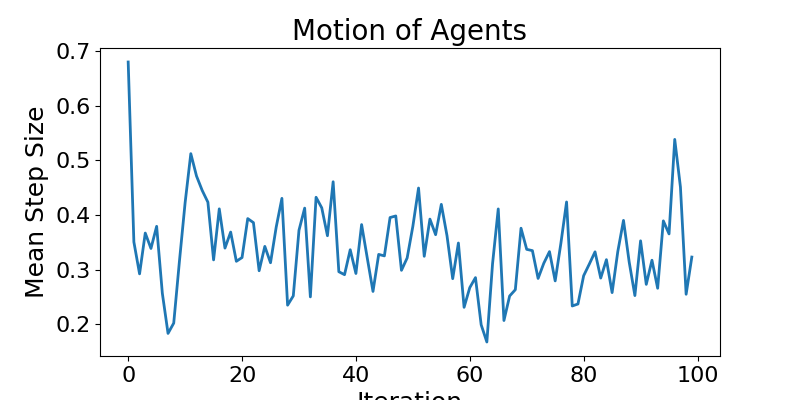

In [0]:
sim = Simulator(max_iterations=100)
sim.run()

* Note that this does not converge. Therefore, I will try the following approach instead and do more extensive convergence tests.

### Version 2: Baby Steps

* In this version, each agent takes a small step at each iteration toward their desired point (one of the points that would form an equilateral triangle with their attractors). This means that the system behaves much more smoothly and stabilizes better than version 1.


* **Selection scheme (same as above)**: Out of the points that would form an equilateral triangle with the agent and her attractors that also lie **in bounds**, take the one **closest** to the agent's present position. If neither lies in bounds, then the agent **doesn't move** at this iteration.

* Speed should be determined by how close you are to your desired triangle. If very far, use close to max step size. If very close, use close to min step size. For Now, everyone takes the same proportion of the distance to their desired location.

<IPython.core.display.Javascript object>


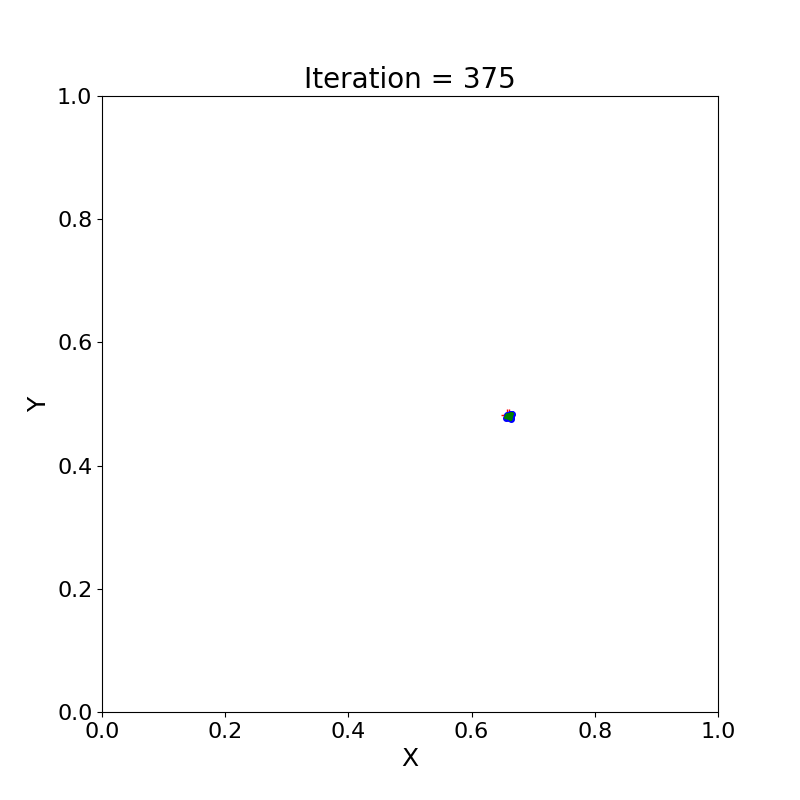

<IPython.core.display.Javascript object>


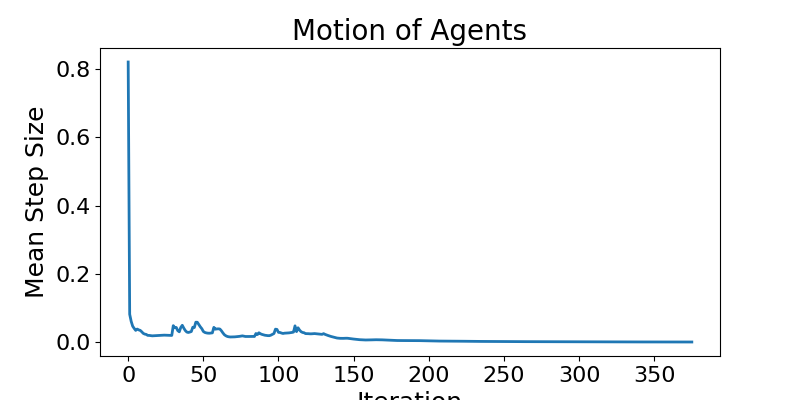

In [0]:
sim = Simulator(max_iterations=500, step_size=0.2)
sim.run()

#### Now test for convergence for different numbers of agents

In [49]:
num_sims_per_trial = 100
num_agents = range(3,51)

converged_at = []
X_final = []
Y_final = []
mean_step = []
agents_container = []
for n in num_agents:
    print("...Simulations for {} agents...".format(n))
    for simulation in range(0, num_sims_per_trial):
        # No Plots
        sim = Simulator(num_agents = n, max_iterations = 1000, step_size = 0.2)
        sim.run(plot_trajectories = False, plot_convergence = False)
        # Mean step size at last iteration
        mean_step.append(sim.mean_step[-1])
        # Converged at Iteration
        converged_at.append(sim.converged_at_iteration)
        X_final.append(sim.X[:,-1])
        Y_final.append(sim.Y[:,-1])
        agents_container.append(n)
        
data = list(zip(agents_container, mean_step, converged_at, X_final, Y_final))
sim_record = pd.DataFrame(data,columns=['Number of Agents','Mean Step Size at Last Iteration','Converged at Iteration','X Final','Y Final'])

sim_record.head()

...Simulations for 3 agents...
...Simulations for 4 agents...


/content/Chaos/Simulator.py:173: ComplexWarning: Casting complex values to real discards the imaginary part
  self.X[agent, self.iteration + 1] = current_x + x_projection
/content/Chaos/Simulator.py:174: ComplexWarning: Casting complex values to real discards the imaginary part
  self.Y[agent, self.iteration + 1] = current_y + y_projection


...Simulations for 5 agents...
...Simulations for 6 agents...
...Simulations for 7 agents...
...Simulations for 8 agents...
...Simulations for 9 agents...
...Simulations for 10 agents...
...Simulations for 11 agents...
...Simulations for 12 agents...
...Simulations for 13 agents...
...Simulations for 14 agents...
...Simulations for 15 agents...
...Simulations for 16 agents...
...Simulations for 17 agents...
...Simulations for 18 agents...
...Simulations for 19 agents...
...Simulations for 20 agents...
...Simulations for 21 agents...
...Simulations for 22 agents...
...Simulations for 23 agents...
...Simulations for 24 agents...
...Simulations for 25 agents...
...Simulations for 26 agents...
...Simulations for 27 agents...
...Simulations for 28 agents...
...Simulations for 29 agents...
...Simulations for 30 agents...
...Simulations for 31 agents...
...Simulations for 32 agents...
...Simulations for 33 agents...
...Simulations for 34 agents...
...Simulations for 35 agents...
...Simulation

,Number of Agents,Mean Step Size at Last Iteration,Converged at Iteration,X Final,Y Final
0,3,0.0,106.0,"[0.44563408327533177, 0.8917502251476994, 0.74...","[0.3416438954860978, 0.2477924057009363, 0.681..."
1,3,0.0,106.0,"[0.6208143858245729, 0.5235278903171029, 0.902...","[0.27427358607654456, 0.6562336481999713, 0.54..."
2,3,0.0,106.0,"[0.8004793814389, 0.5291013992915579, 0.459565...","[0.4876561188818146, 0.7246288909053796, 0.371..."
3,3,0.0,106.0,"[0.5778104016864042, 0.7235544926850842, 0.317...","[0.5612313935268072, 0.9461341773215969, 0.879..."
4,3,0.0,107.0,"[0.6046005685272045, 0.7410333940221109, 0.609...","[0.839013894555472, 0.7655241017162193, 0.6841..."


In [0]:
with open('Runs.csv','w+') as fs:
    sim_record.to_csv(fs, index=False)

files.download('Runs.csv')

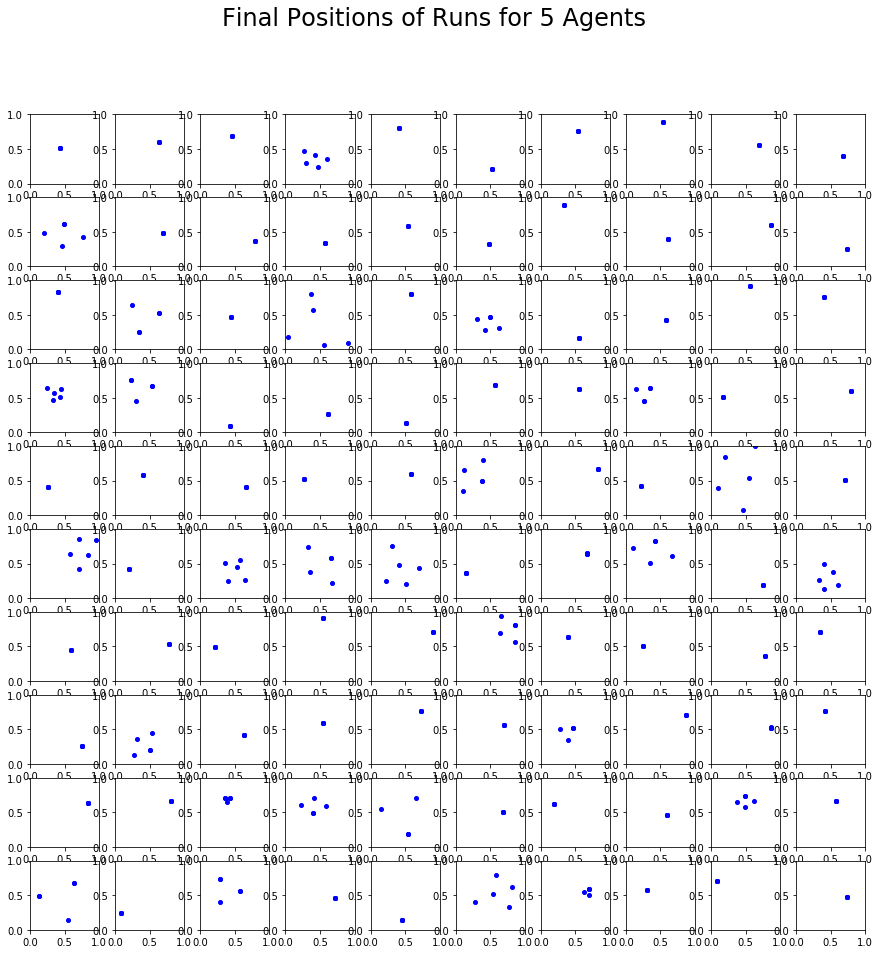

In [65]:
plot_tableau(sim_record, 5)


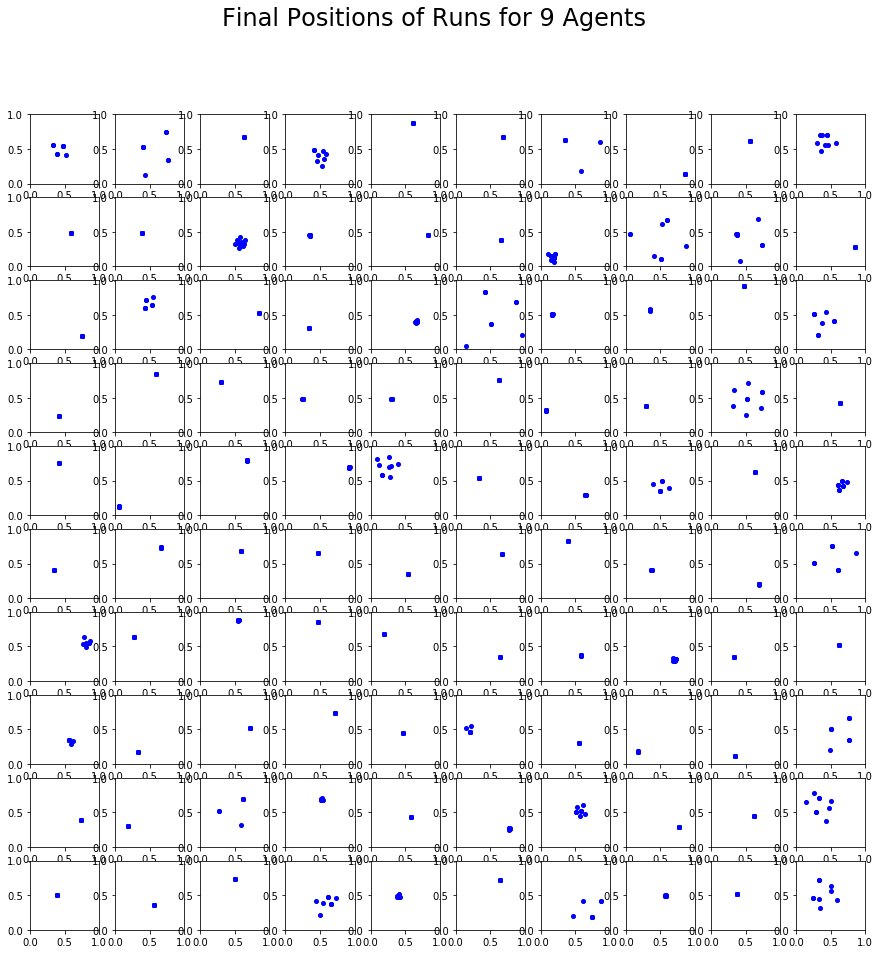

In [66]:
plot_tableau(sim_record, 9)


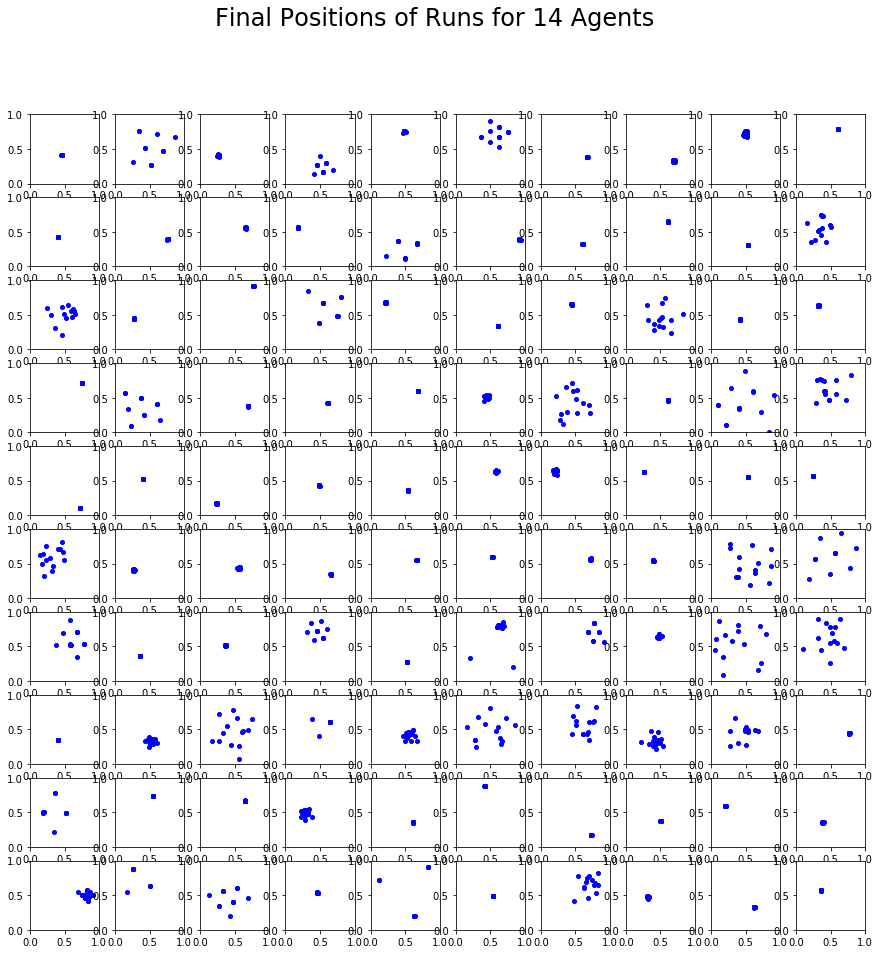

In [67]:
plot_tableau(sim_record, 14)



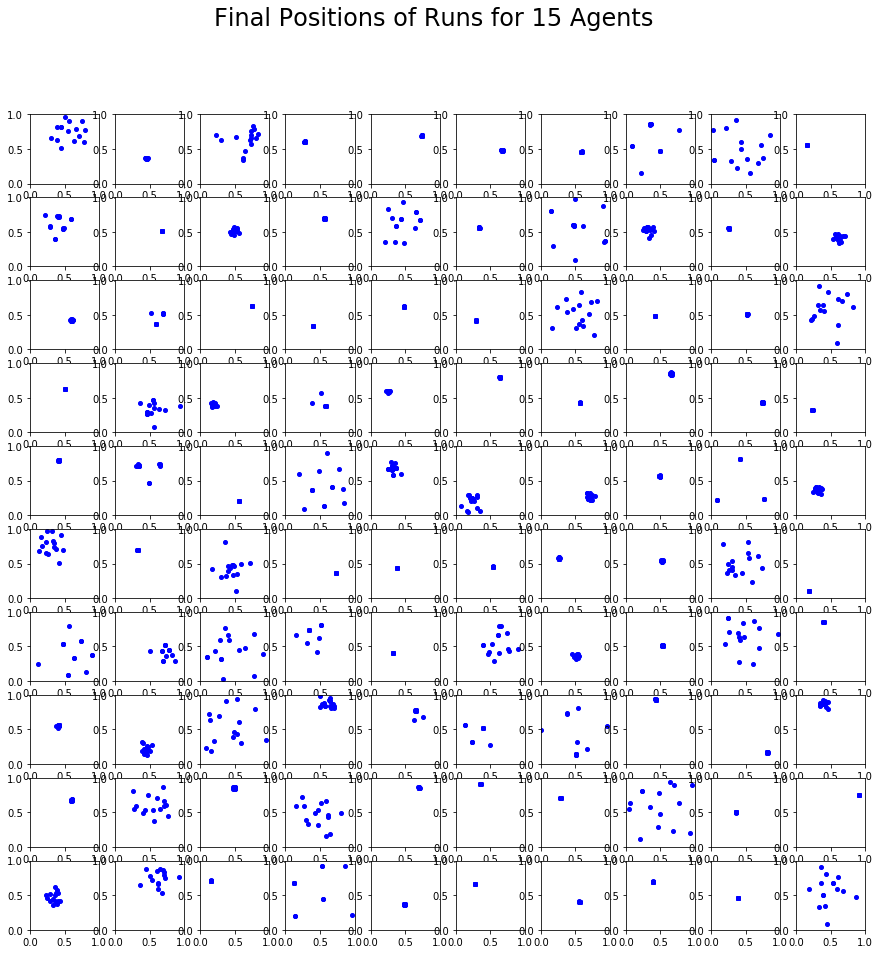

In [69]:
plot_tableau(sim_record, 15)


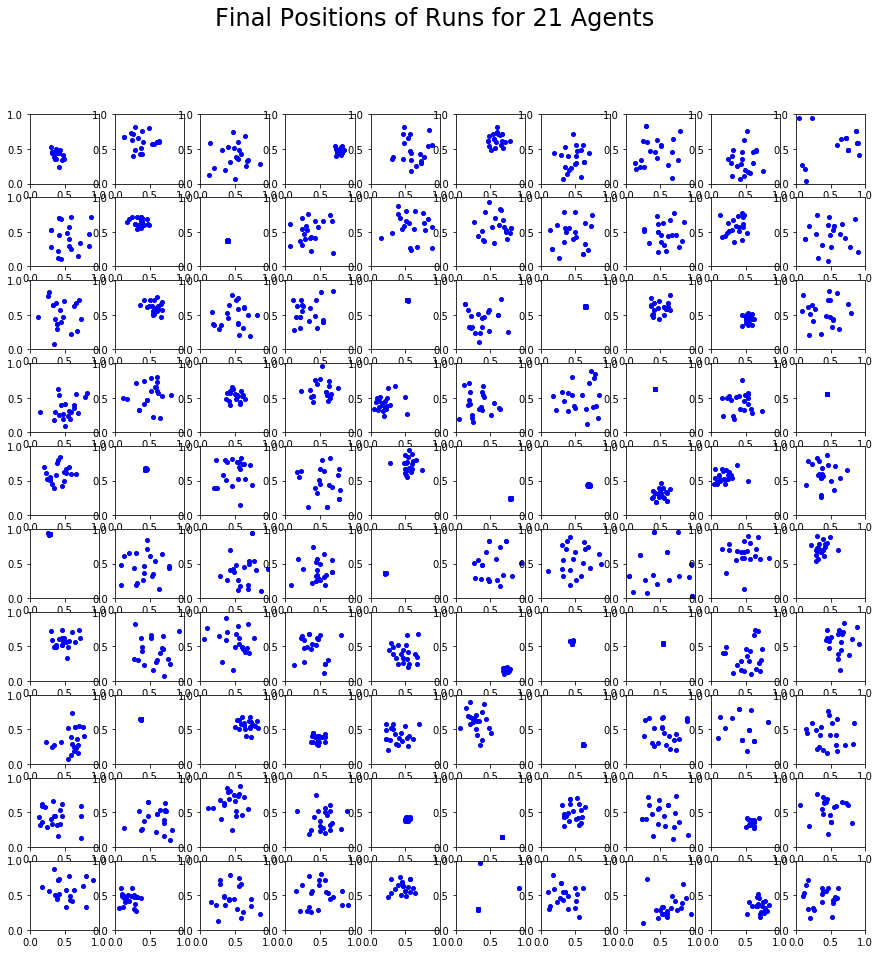

In [71]:
plot_tableau(sim_record, 21)


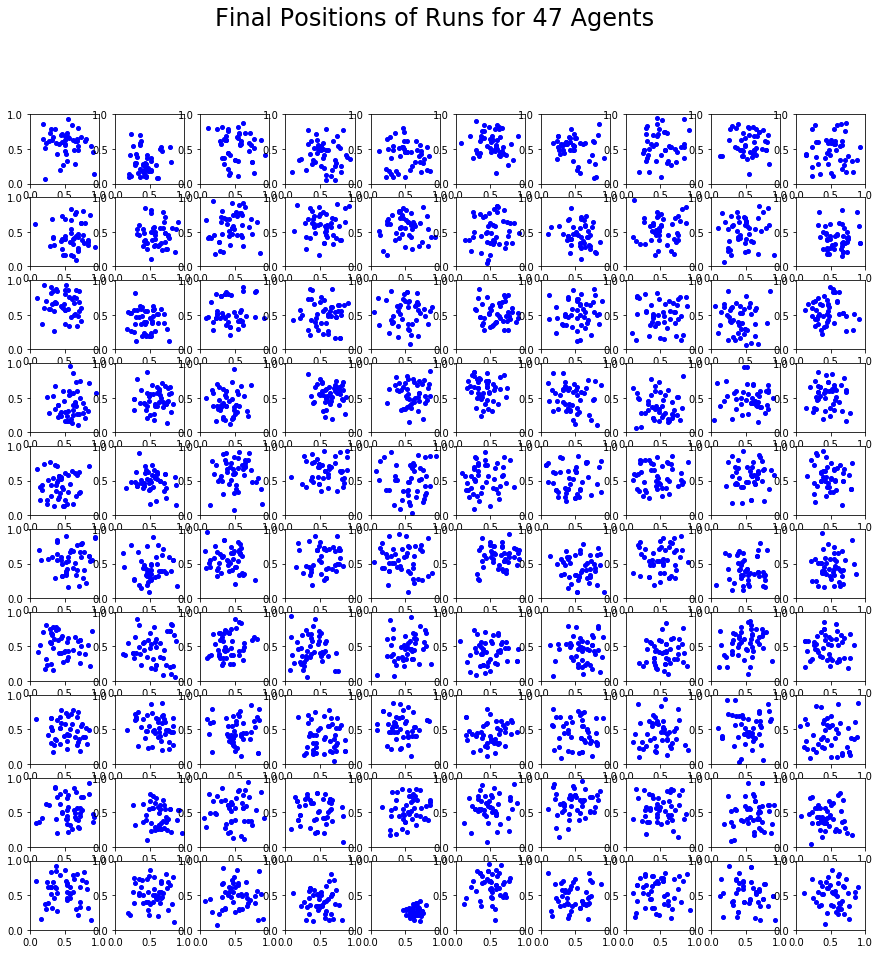

In [72]:
plot_tableau(sim_record, 47)


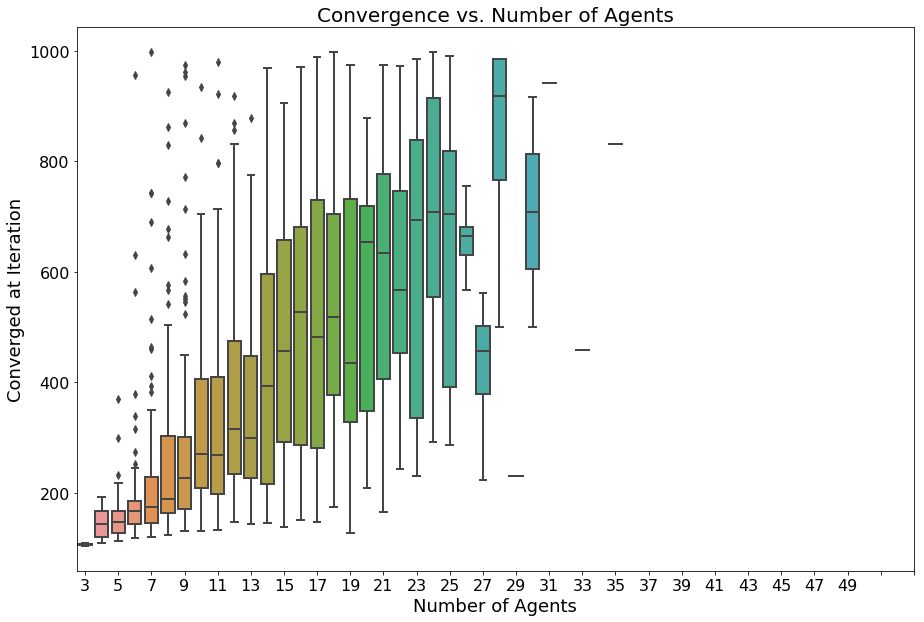

In [75]:
plt.rcParams['figure.figsize'] = (15, 10)
fig1 = plt.subplots() 
plt.rcParams['axes.labelsize'] = 18

sns.boxplot(x="Number of Agents", y="Converged at Iteration", data=sim_record)
xt = plt.xticks(np.arange(0, max(sim_record['Number of Agents'])+1, 2), np.arange(min(sim_record['Number of Agents']), max(sim_record['Number of Agents'])+1, 2))
plt.title('Convergence vs. Number of Agents');


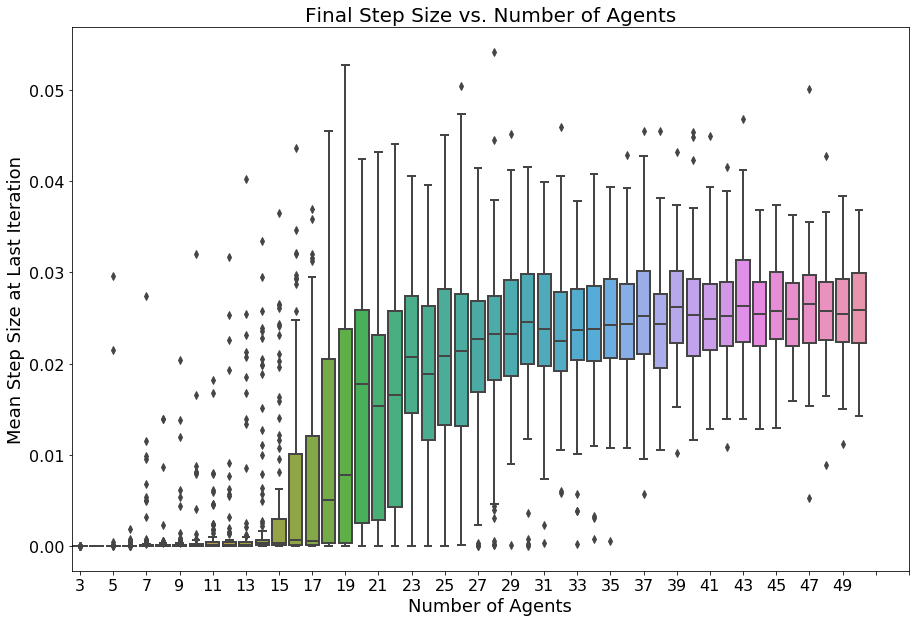

In [76]:
fig2 = plt.subplots() 
ax = sns.boxplot(x="Number of Agents", y="Mean Step Size at Last Iteration", data=sim_record)
xt = plt.xticks(np.arange(0, max(sim_record['Number of Agents'])+1, 2), np.arange(min(sim_record['Number of Agents']), max(sim_record['Number of Agents'])+1, 2))
plt.title('Final Step Size vs. Number of Agents');